# 3.2 Regresión Lineal Simple
### Miguel Ángel Jiménez Cuadrillero
### 2020

Para esta sección se va a utilizar un parquete de información sobre datos de marketing integrado en paquete de R datarium.

https://github.com/kassambara/datarium

Contiene el impacto de tres medios publicitarios (youtube, facebook y periódico) en las ventas. Los datos son el presupuesto publicitario en miles de dólares junto con las ventas. El experimento publicitario se ha repetido 200 veces con diferentes presupuestos y se han registrado las ventas observadas.

OBJETIVO: Queremos predecir las ventas futuras en función del presupuesto publicitario en los distintos medios.

## Carga de Datos

In [57]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,5))

random_state = 123

<Figure size 1440x360 with 0 Axes>

## Análisis Exploratorio de Datos

In [58]:
df = pd.read_csv("./datasets/marketing.csv", sep=';')

In [59]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [60]:
df.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [61]:
df.tail()

,youtube,facebook,newspaper,sales
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36
198,340.32,50.40,79.44,30.60
199,278.52,10.32,10.44,16.08


## Estudio numérico de datos

In [62]:
df.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


## Visualización de Datos

Representamos scatterplots de las variables dos a dos. En la diagonal tenemos el histograma de la variable en cuestión.

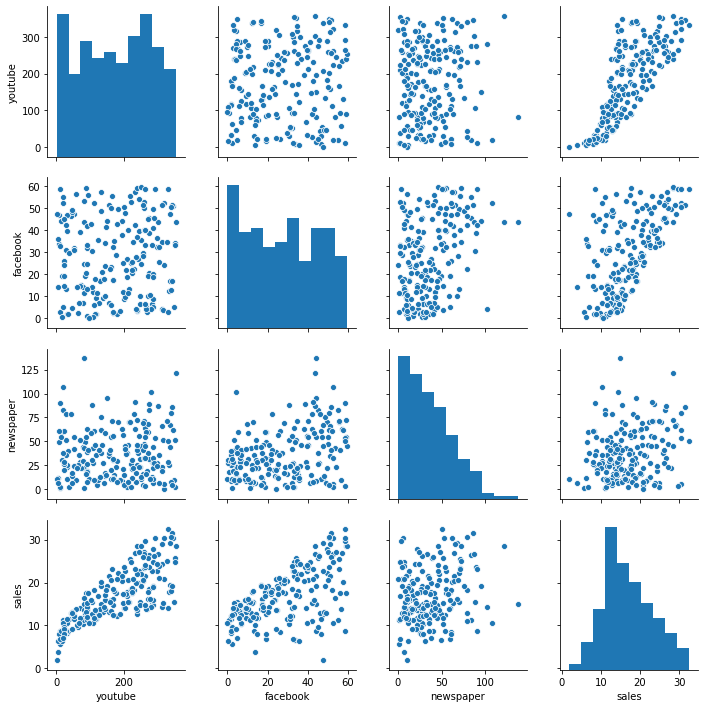

In [63]:
sns.pairplot(df)

## Interpretación preliminar


A simple vista se ve que algunas variables están correlacionadas ya que tienen un cierto patrón lineal.

## Entrenamiento del Modelo

La regresión lineal múltiple intenta encontrar el mejor hiperplano que permita predecir las ventas sobre la base a la combinación lineal de los presupuestos.

## Selección de Features y Label

La ecuación del modelo lineal se puede escribir de la siguiente manera: sales = b0 + b1 * youtube + b2 * facebook + b3 * newspaper


## División Train/Test


In [64]:
df = pd.read_csv("./datasets/marketing.csv", sep=';')

y = df['sales']
X = df[['youtube', 'facebook', 'newspaper']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=123)

## Configuración del Modelo

Los predictores de entrada en este caso no se establecen como una formula si no que asume que son todas las columnas que se le pase al método fit.

In [65]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lm.coef_

array([0.05223041, 0.17954603, 0.01121148])

In [67]:
lm.intercept_

2.2217317660895617

## Evaluación del Ajuste del modelo

In [68]:
from sklearn.metrics import mean_squared_error

y_predict_train = lm.predict(X_train)

#RSE o Model Sigma
sigma = mean_squared_error(y_train, y_predict_train, squared=False)
sigma

1.6542311072169478

In [69]:
r_sq = lm.score(X_test, y_test)

print('R2 coefficient of determination:', r_sq)

R2 coefficient of determination: 0.8657059417141287


In [70]:
RMSE = mean_squared_error(y_train, y_predict_train, squared=True)
RMSE

2.736480556084209

## Resumen

Tanto Sigma como RMSE son bajos, y R2 es alto, por tanto es un buen modelo.

Existen varios predictores relacionados con la salida, tiene un alto grado de ajuste con los datos de entrenamiento. El siguiente paso es evaluar las predicciones.

## Evaluación de las Predicciones

En este momomento vamos a evaluar que tan bueno es el modelo haciendo predicciones sobre datos que no ha visto nunca. Para eso hemos reservado los datos de test.

Pasos a seguir:

* Predecir sales en funcion de las inversiones que existen en los datos de test.
* Evaluar el rendimiento del modelo calculando:
    - RMSE (Root Mean Squared Error): representa la media de las diferencias entre lo predicho y lo observado Mejor cuanto más pequeño.
    - R-square o R2: representa la correlación entre lo predicho y lo observado. Mejor cuanto más grande.

In [73]:
y_predict_test = lm.predict(X_test)

RMSE = mean_squared_error(y_test, y_predict_test, squared=True)
RMSE

5.010370968961571

In [72]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_predict_test)
R2

0.8657059417141287